In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

df = pd.read_csv("/content/drive/My Drive/cleaned_data.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/cleaned_data.csv'

In [19]:
# if mount doesn't work, just upload file and run this code segment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

df = pd.read_csv('cleaned_data_original_with_WGTP.csv')
df = df.dropna()

#df = pd.read_csv('cleaned_data_expanded.csv')

df = df.copy()

df.head()

,Unnamed: 0,HINCP,WGTP,BDSP,NP,NRC,VALP,House on less than one acre,House on one to less than ten acres,House on ten or more acres,Owned with mortgage or loan (include home equity loans),Owned free and clear,Rented,Occupied without payment of rent,No vehicles,1 vehicle,2 vehicles,3 vehicles,4 vehicles,5 vehicles,6 or more vehicles,Married couple household,"Other family household:Male householder, no wife present","Other family household:Female householder, no husband present",Nonfamily household:Male householder:Living alone,Nonfamily household:Male householder:Not living alone,Nonfamily household:Female householder:Living alone,Nonfamily household:Female householder:Not living alone,English Only,Spanish,Other Indo-European Languages,Asian and Pacific Island Languages,Other Language,"Yes, with subscription","Yes, without subscription",No Internet
0,45307,1425000.0,152,2.0,3,1.0,120000.0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,30313,1425000.0,128,5.0,3,0.0,350000.0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,38170,1246000.0,152,3.0,2,0.0,135000.0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,1520,1117700.0,68,5.0,7,0.0,765000.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,43299,1106000.0,96,4.0,3,1.0,950000.0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [20]:
#work on segmenting based on income, not quantity

df_input = df.copy()

#based on 3 persons in household Illinois income limits see https://www.lakecountyha.org/eligibility, also check https://www.dhs.state.il.us/page.aspx?item=118832 for possible best guess
#use Income in 2013 = Current Income / 1+Inflation Rate where inflation rate is 36.17% to find 2013 thresholds (66000 -> 48,475.66 ~ 48500) increase to 50k for full rounded number


#bins = [float('-inf'),  50000, 200000, float('inf')]
#labels = ["low", "medium", "high"]

bins = [float('-inf'), 50000, float('inf')]
labels = [ "low", "not low"]



# Use pd.cut to categorize based on thresholds
df_input['HINCP'] = pd.cut(df_input['HINCP'], bins=bins, labels=labels, right=False)


#categorized_df = pd.qcut(df['HINCP'], 3, labels=["low", "medium", "high"])
#categorized_df = pd.qcut(df_input['HINCP'], 2, labels=["low", "high"])

#df_input['HINCP'] = categorized_df

#df_input = df_input.drop(columns = ['WGTP']).copy()

df_input.head()

,Unnamed: 0,HINCP,WGTP,BDSP,NP,NRC,VALP,House on less than one acre,House on one to less than ten acres,House on ten or more acres,Owned with mortgage or loan (include home equity loans),Owned free and clear,Rented,Occupied without payment of rent,No vehicles,1 vehicle,2 vehicles,3 vehicles,4 vehicles,5 vehicles,6 or more vehicles,Married couple household,"Other family household:Male householder, no wife present","Other family household:Female householder, no husband present",Nonfamily household:Male householder:Living alone,Nonfamily household:Male householder:Not living alone,Nonfamily household:Female householder:Living alone,Nonfamily household:Female householder:Not living alone,English Only,Spanish,Other Indo-European Languages,Asian and Pacific Island Languages,Other Language,"Yes, with subscription","Yes, without subscription",No Internet
0,45307,not low,152,2.0,3,1.0,120000.0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,30313,not low,128,5.0,3,0.0,350000.0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,38170,not low,152,3.0,2,0.0,135000.0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,1520,not low,68,5.0,7,0.0,765000.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,43299,not low,96,4.0,3,1.0,950000.0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [21]:
df_columns = df_input.columns
df_columns

Index(['Unnamed: 0', 'HINCP', 'WGTP', 'BDSP', 'NP', 'NRC', 'VALP', 'House on less than one acre', 'House on one to less than ten acres', 'House on ten or more acres', 'Owned with mortgage or loan (include home equity loans)', 'Owned free and clear', 'Rented', 'Occupied without payment of rent', 'No vehicles', '1 vehicle', '2 vehicles', '3 vehicles', '4 vehicles', '5 vehicles', '6 or more vehicles', 'Married couple household', 'Other family household:Male householder, no wife present', 'Other family household:Female householder, no husband present', 'Nonfamily household:Male householder:Living alone', 'Nonfamily household:Male householder:Not living alone', 'Nonfamily household:Female householder:Living alone', 'Nonfamily household:Female householder:Not living alone', 'English Only', 'Spanish', 'Other Indo-European Languages', 'Asian and Pacific Island Languages', 'Other Language', 'Yes, with subscription', 'Yes, without subscription', 'No Internet'], dtype='object')

In [22]:
df_input = df_input.drop(columns = ['Unnamed: 0']).copy()

In [23]:
#df_input = df_input[['HINCP', 'BDSP', 'NP', 'NRC', 'VALP']]

df_input.head()

,HINCP,WGTP,BDSP,NP,NRC,VALP,House on less than one acre,House on one to less than ten acres,House on ten or more acres,Owned with mortgage or loan (include home equity loans),Owned free and clear,Rented,Occupied without payment of rent,No vehicles,1 vehicle,2 vehicles,3 vehicles,4 vehicles,5 vehicles,6 or more vehicles,Married couple household,"Other family household:Male householder, no wife present","Other family household:Female householder, no husband present",Nonfamily household:Male householder:Living alone,Nonfamily household:Male householder:Not living alone,Nonfamily household:Female householder:Living alone,Nonfamily household:Female householder:Not living alone,English Only,Spanish,Other Indo-European Languages,Asian and Pacific Island Languages,Other Language,"Yes, with subscription","Yes, without subscription",No Internet
0,not low,152,2.0,3,1.0,120000.0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,not low,128,5.0,3,0.0,350000.0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,not low,152,3.0,2,0.0,135000.0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,not low,68,5.0,7,0.0,765000.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,not low,96,4.0,3,1.0,950000.0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [24]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

X = df_input.iloc[0:, 1:].values
Y = df_input.iloc[0:, [0]].values

#X = df_input.iloc[0:, 2:].values
#Y = df_input.iloc[0:, [1]].values

X_min = np.min(X, axis=0)
X_max = np.max(X, axis=0)
X_normalized = (X - X_min) / (X_max - X_min)
#X = (X - X_min) / (X_max - X_min)

encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

dummy_y = to_categorical(encoded_Y)
num_classes = dummy_y.shape[1]

X_train, X_test, Y_train, Y_test = train_test_split(X, dummy_y, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [25]:
import numpy as np

# Count the number of occurrences of each class (0, 1, 2, ...)
class_counts = np.sum(dummy_y, axis=0)

# Display the counts
for class_index, count in enumerate(class_counts):
    print(f"Class {class_index}: {count} samples")

Class 0: 19185.0 samples
Class 1: 27274.0 samples


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv1D, Flatten, Dense, MaxPooling1D, Dropout, BatchNormalization
import tensorflow as tf
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2

# CNN MODEL

tf.random.set_seed(42)

model = Sequential()
model.add(Input(shape=(X_train.shape[1], 1)))

# First block
model.add(Conv1D(32, kernel_size=3, activation='relu', padding='same'))
model.add(Conv1D(32, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())

# Second block
model.add(Conv1D(64, kernel_size=3, activation='relu', padding='same'))
model.add(Conv1D(64, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())

# Third block
model.add(Conv1D(128, kernel_size=3, activation='relu', padding='same'))
model.add(Conv1D(128, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())

# Fourth block
model.add(Conv1D(256, kernel_size=3, activation='relu', padding='same'))
model.add(Conv1D(256, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())

# Flattening layer
model.add(Flatten())

# Fully connected layers
model.add(Dense(512, activation='relu'))
#model.add(Dense(256, activation='relu'))

model.add(Dropout(0.5))  # Regularization
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Regularization
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Output layer
model.add(Dense(units = num_classes, activation = 'softmax', kernel_regularizer=l2(0.1)))
#model.add(Dense(units = num_classes, activation = 'sigmoid', kernel_regularizer=l2(0.1))) #has a worse score

In [27]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=20,
    restore_best_weights=True
)

#X_train['WGTP'] = first column of X_train is WGTP
sample_weights = X_train[:, 0]

#drop WGTP column from train
X_train = np.delete(X_train, 0, axis=1)
X_test = np.delete(X_test, 0, axis=1)

In [29]:
with tf.device('/device:GPU:0'):
  history = model.fit(X_train, Y_train, batch_size = 64, epochs = 100, verbose = 1, validation_data = (X_test, Y_test), sample_weight = sample_weights, callbacks = [early_stopping])

  #history = model.fit(X_train, Y_train, batch_size = 64, epochs = 100, verbose = 1, validation_data = (X_test, Y_test), callbacks = [early_stopping])

Epoch 1/100
581/581 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - accuracy: 0.6396 - loss: 62.6814 - val_accuracy: 0.6420 - val_loss: 0.8973
Epoch 2/100
581/581 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6563 - loss: 60.0211 - val_accuracy: 0.6545 - val_loss: 0.8227
Epoch 3/100
581/581 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6576 - loss: 59.9252 - val_accuracy: 0.6613 - val_loss: 0.7743
Epoch 4/100
581/581 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6605 - loss: 59.6636 - val_accuracy: 0.5735 - val_loss: 0.8465
Epoch 5/100
581/581 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7496 - loss: 50.6491 - val_accuracy: 0.5724 - val_loss: 0.7923
Epoch 6/100
581/581 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7523 - loss: 49.7101 - val_accuracy: 0.6522 - val_loss: 0.7254
Epoch 7/100
581/581 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7531 - loss: 49.6125 - val_accuracy: 0.7641 - val_loss: 0.5892
Epoch 8/100
581/581 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7552 - loss: 49.0191 

In [30]:
#make sure this is correct
loss, mae = model.evaluate(X_test, Y_test, verbose=0)
print(f"Test Accuracy: {mae}")

Test Accuracy: 0.7791648507118225


In [31]:
loss = history.history['loss']
print(loss)

[60.266700744628906, 59.33213424682617, 59.28245544433594, 57.59799575805664, 49.828617095947266, 49.046844482421875, 48.7625732421875, 48.49873733520508, 48.25112533569336, 48.16910171508789, 48.01422882080078, 47.988033294677734, 48.04952621459961, 47.7267951965332, 47.538543701171875, 47.57316207885742, 47.45671081542969, 47.489707946777344, 47.44242477416992, 47.46018600463867, 47.38597106933594, 47.34754180908203, 47.27275848388672, 47.04392623901367, 46.97955322265625, 46.90998840332031, 46.87114715576172, 46.95445251464844, 46.7597770690918, 46.627174377441406, 46.680816650390625, 46.614227294921875, 46.60318374633789, 46.41255569458008, 46.34867477416992, 46.34328079223633, 46.39784240722656]


In [32]:
val_loss = history.history['val_loss']
print(val_loss)

[0.8972833156585693, 0.822712242603302, 0.7743439078330994, 0.84647536277771, 0.7923169732093811, 0.7253742218017578, 0.5891895890235901, 0.5776821970939636, 0.5628183484077454, 0.5516164302825928, 0.5489035844802856, 0.5638522505760193, 0.5480278730392456, 0.5510574579238892, 0.5433602929115295, 0.5404910445213318, 0.5366732478141785, 0.568389356136322, 0.5459831953048706, 0.5434952974319458, 0.5728382468223572, 0.5739428997039795, 0.5426384210586548, 0.5435488820075989, 0.5562022924423218, 0.539610743522644, 0.5385846495628357, 0.5343772768974304, 0.5332025289535522, 0.5309130549430847, 0.5371312499046326, 0.5386700630187988, 0.5480145215988159, 0.5339081287384033, 0.5267866253852844, 0.5388955473899841, 0.5474337935447693]


Loss after final iteration:  0.5474337935447693
Training loss after final iteration:  46.39784240722656


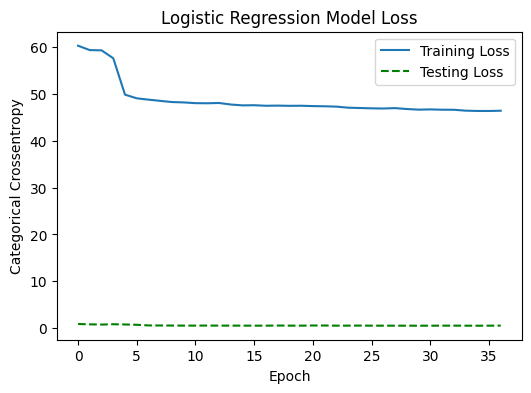

In [33]:
#Plot
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
# # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'g--')
plt.title('Logistic Regression Model Loss')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
print("Loss after final iteration: ", history.history['val_loss'][-1])
print ("Training loss after final iteration: ", history.history['loss'][-1])
plt.show()

Confusion Matrix below for troubleshooting

In [16]:
import numpy as np
def ohe_to_classes(y):
  '''
converts one hot encoding to classes
y: a list of one-hot-encoded classes of data points
'''
  return [np.argmax(v) for v in y]

In [34]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
predicted_all1 = model.predict(np.array(X_test))

predicted_all = np.argmax(predicted_all1 ,axis=1)
print("predicted classes: {}".format(predicted_all))
# Have to convert one-hot-encoding to actual classes: 0 - 9
y_true_classes = ohe_to_classes(Y_test)
print('accuracy', accuracy_score(predicted_all, y_true_classes))
confusion_mat = confusion_matrix(predicted_all, y_true_classes)
print("confusion matrix\n{}\n\n".format(confusion_mat))
print(classification_report(predicted_all, y_true_classes))

291/291 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
predicted classes: [1 1 0 ... 0 0 1]
accuracy 0.77916487300904
confusion matrix
[[2641  828]
 [1224 4599]]


              precision    recall  f1-score   support

           0       0.68      0.76      0.72      3469
           1       0.85      0.79      0.82      5823

    accuracy                           0.78      9292
   macro avg       0.77      0.78      0.77      9292
weighted avg       0.79      0.78      0.78      9292



Print out accuracy in a more visual way below, maybe heatmap?

Text(0.5, 1.0, 'Heat Map of Confusion Matrix')

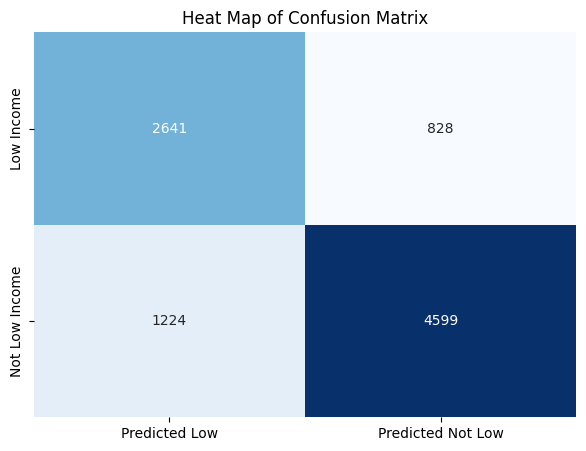

In [36]:
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted Low", "Predicted Not Low"],
            yticklabels=["Low Income", "Not Low Income"], cbar=False)

plt.title("Heat Map of Confusion Matrix")

In [ ]:
!pip install scikit-learn

291/291 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


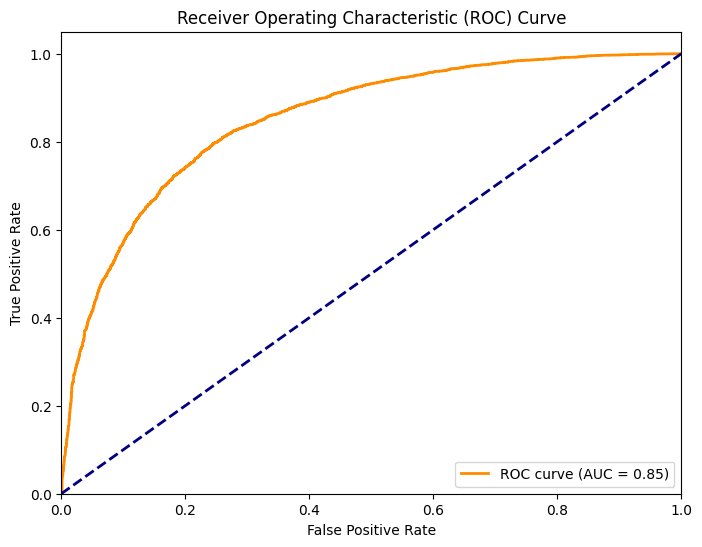

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

classes = range(len(Y_test[0]))

Y_test_binary = label_binarize(Y_test, classes=classes)

Y_prob = model.predict(X_test)[:, 1]

#fpr, tpr, thresholds = roc_curve(Y_test, Y_prob)
fpr, tpr, thresholds = roc_curve(Y_test_binary[:, 1], Y_prob)
roc_auc = auc(fpr, tpr)

#Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random classifier (diagonal)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.001s...
[t-SNE] Computed neighbors for 10000 samples in 0.977s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 10.817227
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.175743
[t-SNE] KL divergence after 300 iterations: 1.685496
313/313 ━━━━━━━━━━━━━━━━

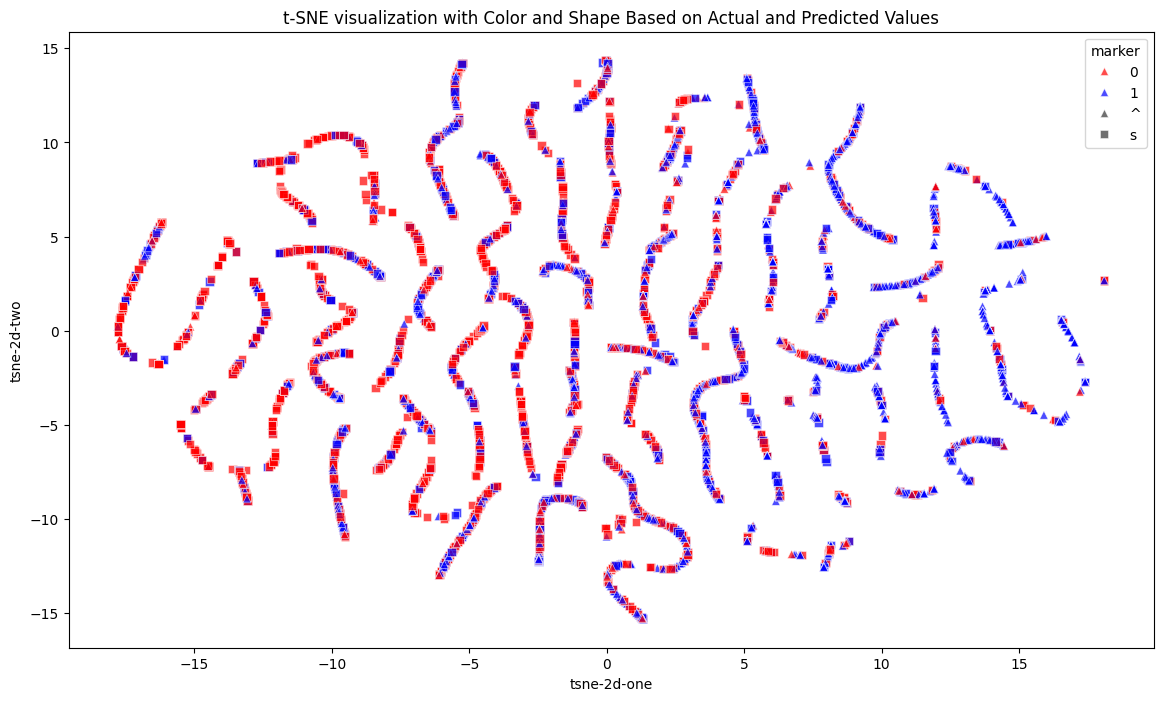

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import matplotlib.markers as mmarkers

# For memory and computation time considerations, we will only use the first 10,000 samples to run t-SNE on.
N = 10000
np.random.seed(42)
random_indices = np.random.choice(X.shape[0], size=10000, replace=False)
df_subset = X[random_indices]
np.random.seed(42)
dummy_y_subset = dummy_y[random_indices]

# Use the t-SNE algorithm to reduce dimensionality
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_subset)

# Convert the subset into a DataFrame
df_subset = pd.DataFrame(df_subset)

# Add t-SNE results to the DataFrame
df_subset['tsne-2d-one'] = tsne_results[:, 0]
df_subset['tsne-2d-two'] = tsne_results[:, 1]

# Actual values (colors will be based on this)
hue_data = np.argmax(dummy_y_subset, axis=1)

# Get the required column indices (assuming you want all but the last 2 columns which are the TSNE components)
required_column_indices = list(range(df_subset.shape[1] - 2))  # Exclude the last 2 columns

# Select the columns from df_subset based on indices
required_columns_df = df_subset.iloc[:, required_column_indices]
required_columns_df_values = required_columns_df.values.reshape(required_columns_df.shape[0], -1)

#removing weight columns
required_columns_df_values = np.delete(required_columns_df_values, 0, axis=1)

#print(required_columns_df_values)
#print(model.input_shape)

predictions_prob = model.predict(required_columns_df_values)

predictions = (predictions_prob[:,1] > 0.5).astype(int)

# Create a new column for marker styles (square for 0, triangle for 1)
df_subset['marker'] = ['s' if pred == 0 else '^' for pred in predictions]

# Plot the results
plt.figure(figsize=(14, 8))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=hue_data,  # Color based on actual values
    palette={0: 'red', 1: 'blue'},  # Red for 0, Blue for 1
    style='marker',  # Shape based on predicted values
    markers={'s': 's', '^': '^'},  # Define marker shapes
    data=df_subset,
    legend="full",
    alpha=0.7
)

plt.title("t-SNE visualization with Color and Shape Based on Actual and Predicted Values")
plt.show()

In [ ]:
#create attribute analysis
attribute_df = []

In [ ]:
#create attribute analysis
df.append(["column_name", f"{mae}"])